In [382]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [211]:
# df = pd.read_spss('../data/CCAM SPSS Data 2008-2018.sav')

In [212]:
# geo = pd.read_csv('../data/YCOM6.0_2021_Data_.csv', encoding='latin-1')

In [285]:
df = pd.read_spss('../data/CCAM SPSS Data 2008-2018.sav')
df.to_csv('../data/CCAM SPSS Data 2008-2018.csv', index=False)
df = pd.read_csv('../data/CCAM SPSS Data 2008-2018.csv')

27 - 39 rows for Vilo

In [286]:
df.head()

,case_ID,wave,year,weight_wave,weight_aggregate,happening,cause_original,cause_other_text,cause_recoded,sci_consensus,worry,harm_personally,harm_US,harm_dev_countries,harm_future_gen,harm_plants_animals,when_harm_US,reg_CO2_pollutant,reg_utilities,fund_research,reg_coal_emissions,discuss_GW,hear_GW_media,gender,age,age_category,generation,educ,educ_category,income,income_category,race,ideology,party,party_w_leaners,party_x_ideo,registered_voter,region9,region4,religion,religion_other_nonchristian,evangelical,service_attendance,marit_status,employment,house_head,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus,house_type,house_own
0,2.0,Nov 2008,2008,0.54,0.294402,Yes,Caused mostly by human activities,NaN,Caused mostly by human activities,Most scientists think global warming is happening,Somewhat worried,Only a little,A moderate amount,A great deal,A great deal,A great deal,In 10 years,Strongly support,Strongly support,Strongly support,NaN,Occasionally,NaN,Female,78.0,55+ years,Silent (1928 - 1945),High school graduate - high school diploma or ...,High school,"$50,000 to $59,999","$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,Republicans,Conservative Republican,Registered,South Atlantic,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",NaN,No,Once a week,Widowed,Not working - retired,Not head of household,3.0,0.0,0.0,0.0,0.0,3.0,One-family house detached from any other house,Owned by you or someone in your household
1,3.0,Nov 2008,2008,0.85,0.463411,Don't know,Caused mostly by human activities,NaN,Caused mostly by human activities,Don't know enough to say,Not very worried,Only a little,Refused,Only a little,A moderate amount,A moderate amount,In 50 years,Somewhat support,Somewhat support,Somewhat support,NaN,Rarely,NaN,Male,45.0,35-54 years,Baby Boomers (1946 - 1964),10th grade,Less than high school,"$30,000 to $34,999","Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,No party/Not interested in politics,No Party/Not Interested in politics,Not registered,East-North Central,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",NaN,Don't Know,Once a year or less,Never married,Not working - disabled,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,Mobile home,Rented
2,5.0,Nov 2008,2008,0.49,0.267143,Don't know,Caused mostly by natural changes in the enviro...,NaN,Caused mostly by natural changes in the enviro...,There is a lot of disagreement among scientist...,Not at all worried,Not at all,Not at all,Not at all,Not at all,Not at all,Never,Somewhat oppose,Strongly oppose,Strongly oppose,NaN,Never,NaN,Female,54.0,35-54 years,Baby Boomers (1946 - 1964),Professional or Doctorate degree,Bachelor's degree or higher,"$30,000 to $34,999","Less than $50,000",Hispanic,Somewhat conservative,Republican,Republicans,Conservative Republican,Registered,Mountain,West,Mormon,NaN,No,Once a week,Married,Not working - looking for work,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
3,6.0,Nov 2008,2008,0.29,0.158105,Yes,Caused mostly by natural changes in the enviro...,NaN,Caused mostly by natural changes in the enviro...,Most scientists think global warming is happening,Somewhat worried,Only a little,Only a little,A moderate amount,A moderate amount,A moderate amount,In 25 years,Somewhat support,Strongly support,Strongly support,NaN,Rarely,NaN,Male,71.0,55+ years,Silent (1928 - 1945),Master's degree,Bachelor's degree or higher,"$100,000 to $124,999","$100,000 or more","White, Non-Hispanic",Somewhat conservative,Independent,Republicans,Conservative Republican,Registered,South Atlantic,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",NaN,No,Once a year or less,Married,Not working - retired,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
4,7.0,Nov

In [287]:
responses = pd.DataFrame(df.columns[range(26,38)])

### Looking at The Target Feature

In [410]:
df['happening'].value_counts()

Yes           14915
Don't know     3818
No             3612
Name: happening, dtype: int64

### The Majority Class of our Y value is 66%

In [411]:
df['happening'].value_counts(normalize=True)

Yes           0.667487
Don't know    0.170866
No            0.161647
Name: happening, dtype: float64

In [412]:
df = df.drop(df[df.happening == 'Refused'].index)

In [413]:
df['happening'].value_counts(normalize=True)

Yes           0.667487
Don't know    0.170866
No            0.161647
Name: happening, dtype: float64

In [414]:
df['happening'].value_counts()

Yes           14915
Don't know     3818
No             3612
Name: happening, dtype: int64

In [415]:
df.groupby(['year']).mean()

,case_ID,weight_wave,weight_aggregate,age,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus
year,,,,,,,,,,
2008,1218.427842,1.001169,0.545827,50.133179,2.460325,0.018561,0.074246,0.178190,0.130394,2.058933
2010,4757.498759,0.999087,1.164105,47.173697,3.103226,0.041687,0.148883,0.337965,0.462531,2.112159
2011,9535.364510,0.996254,1.169481,48.200202,2.837209,0.056623,0.128918,0.238119,0.192113,2.221436
2012,13585.865534,1.000374,1.140751,49.801942,2.722816,0.052427,0.106796,0.200971,0.173301,2.189320
2013,17580.678093,0.997435,1.255068,51.259775,2.600428,0.044992,0.106588,0.190680,0.153187,2.104981
2014,21785.387139,1.000409,1.031700,50.526247,2.598863,0.047244,0.101487,0.171479,0.148294,2.130359
2015,25711.603934,0.999998,0.909978,50.451215,2.662939,0.040879,0.105669,0.203625,0.168916,2.143849
2016,29687.522634,0.999999,0.971019,51.486420,2.636214,0.035802,0.103292,0.178601,0.166255,2.152263
2017,33735.430350,0.999999,0.918124,52.204669,2.621790,0.039300,0.100000,0.175875,0.161089,2.145525


### Dummifying values to do some initial EDA

In [294]:
dum_happen = pd.get_dummies(df['happening'])

In [295]:
concat = pd.concat([responses, dum_happen], axis=1)

In [296]:
concat['year'] = df['year']

In [297]:
concat.groupby(['year']).mean()

,Don't know,No,Yes
year,,,
2008,0.174478,0.121578,0.703944
2010,0.202978,0.211414,0.585608
2011,0.193124,0.183519,0.623357
2012,0.176699,0.153398,0.669903
2013,0.176219,0.183717,0.640064
2014,0.174103,0.185477,0.640420
2015,0.167759,0.179715,0.652526
2016,0.164198,0.128807,0.706996
2017,0.156031,0.140467,0.703502


### Taking a look at the features below


In [298]:
df2 = df[['generation', 'educ', 'educ_category', 'income', 'income_category',
          'race', 'ideology', 'party', 'party_w_leaners', 'party_x_ideo',
          'registered_voter', 'region9', 'region4']]

In [299]:
df2.describe()

,generation,educ,educ_category,income,income_category,race,ideology,party,party_w_leaners,party_x_ideo,registered_voter,region9,region4
count,22345,22345,22345,22345,22345,22345,22345,22345,22345,22345,22345,22345,22345
unique,6,14,4,21,3,4,6,6,5,7,6,9,4
top,Baby Boomers (1946 - 1964),High school graduate - high school diploma or ...,Bachelor's degree or higher,"$100,000 to $124,999","Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",Democrat,Democrats,Conservative Republican,Registered,South Atlantic,South
freq,9132,6303,7700,2567,8750,16777,8837,7397,9237,5491,18820,4325,7847


### Checking the null values

In [300]:
df2.isnull().sum()

generation          0
educ                0
educ_category       0
income              0
income_category     0
race                0
ideology            0
party               0
party_w_leaners     0
party_x_ideo        0
registered_voter    0
region9             0
region4             0
dtype: int64

### Creating Dummies from the features

In [301]:
df2_dum = pd.get_dummies(df2)

In [302]:
df2_dum.head()

,generation_Baby Boomers (1946 - 1964),generation_Generation X (1965 - 1980),generation_Greatest (Before 1928),generation_Millennials (1981 - 1996),generation_Silent (1928 - 1945),generation_iGen‎/Gen Z (1997 - ),educ_10th grade,educ_11th grade,educ_12th grade no diploma,"educ_1st, 2nd, 3rd, or 4th grade",educ_5th or 6th grade,educ_7th or 8th grade,educ_9th grade,educ_Associate's degree,educ_Bachelor's degree,educ_High school graduate - high school diploma or the equivalent (GED),educ_Master's degree,educ_No formal education,educ_Professional or Doctorate degree,"educ_Some college, no degree",educ_category_Bachelor's degree or higher,educ_category_High school,educ_category_Less than high school,educ_category_Some college,"income_$10,000 to $12,499","income_$100,000 to $124,999","income_$12,500 to $14,999","income_$125,000 to $149,999","income_$15,000 to $19,999","income_$150,000 to $174,999","income_$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)","income_$20,000 to $24,999","income_$200,000 to $249,999 (Nov 2016 on)","income_$25,000 to $29,999","income_$250,000 or more (Nov 2016 on)","income_$30,000 to $34,999","income_$35,000 to $39,999","income_$40,000 to $49,999","income_$5,000 to $7,499","income_$50,000 to $59,999","income_$60,000 to $74,999","income_$7,500 to $9,999","income_$75,000 to $84,999","income_$85,000 to $99,999","income_Less than $5,000","income_category_$100,000 or more","income_category_$50,000 to $99,999","income_category_Less than $50,000","race_Black, Non-Hispanic",race_Hispanic,"race_Other, Non-Hispanic","race_White, Non-Hispanic","ideology_Moderate, middle of the road",ideology_Refused,ideology_Somewhat conservative,ideology_Somewhat liberal,ideology_Very conservative,ideology_Very liberal,party_Democrat,party_Independent,party_No party/not interested in politics,party_Other; Please specify:,party_Refused,party_Republican,party_w_leaners_Democrats,party_w_leaners_Independent/Other,party_w_leaners_No party/Not interested in politics,party_w_leaners_Refused,party_w_leaners_Republicans,party_x_ideo_Conservative Republican,party_x_ideo_Independent (Non-Leaning),party_x_ideo_Liberal Democrat,party_x_ideo_Liberal/Moderate Republican,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,party_x_ideo_Refused,registered_voter_Don't know,registered_voter_Not registered,registered_voter_Not sure,registered_voter_Prefer not to answer,registered_voter_Refused,registered_voter_Registered,region9_East-North Central,region9_East-South Central,region9_Mid-Atlantic,region9_Mountain,region9_New England,region9_Pacific,region9_South Atlantic,region9_West-North Central,region9_West-South Central,region4_Midwest,region4_Northeast,region4_South,region4_West
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [303]:
df2.shape

(22345, 13)

In [304]:
dummies = pd.concat([df2_dum, dum_happen], axis=1)

### I am looking at the breakdown of people who answered Yes vs Not yes for if global warming is happening

In [305]:
dummies.groupby(['Yes']).mean()

,generation_Baby Boomers (1946 - 1964),generation_Generation X (1965 - 1980),generation_Greatest (Before 1928),generation_Millennials (1981 - 1996),generation_Silent (1928 - 1945),generation_iGen‎/Gen Z (1997 - ),educ_10th grade,educ_11th grade,educ_12th grade no diploma,"educ_1st, 2nd, 3rd, or 4th grade",educ_5th or 6th grade,educ_7th or 8th grade,educ_9th grade,educ_Associate's degree,educ_Bachelor's degree,educ_High school graduate - high school diploma or the equivalent (GED),educ_Master's degree,educ_No formal education,educ_Professional or Doctorate degree,"educ_Some college, no degree",educ_category_Bachelor's degree or higher,educ_category_High school,educ_category_Less than high school,educ_category_Some college,"income_$10,000 to $12,499","income_$100,000 to $124,999","income_$12,500 to $14,999","income_$125,000 to $149,999","income_$15,000 to $19,999","income_$150,000 to $174,999","income_$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)","income_$20,000 to $24,999","income_$200,000 to $249,999 (Nov 2016 on)","income_$25,000 to $29,999","income_$250,000 or more (Nov 2016 on)","income_$30,000 to $34,999","income_$35,000 to $39,999","income_$40,000 to $49,999","income_$5,000 to $7,499","income_$50,000 to $59,999","income_$60,000 to $74,999","income_$7,500 to $9,999","income_$75,000 to $84,999","income_$85,000 to $99,999","income_Less than $5,000","income_category_$100,000 or more","income_category_$50,000 to $99,999","income_category_Less than $50,000","race_Black, Non-Hispanic",race_Hispanic,"race_Other, Non-Hispanic","race_White, Non-Hispanic","ideology_Moderate, middle of the road",ideology_Refused,ideology_Somewhat conservative,ideology_Somewhat liberal,ideology_Very conservative,ideology_Very liberal,party_Democrat,party_Independent,party_No party/not interested in politics,party_Other; Please specify:,party_Refused,party_Republican,party_w_leaners_Democrats,party_w_leaners_Independent/Other,party_w_leaners_No party/Not interested in politics,party_w_leaners_Refused,party_w_leaners_Republicans,party_x_ideo_Conservative Republican,party_x_ideo_Independent (Non-Leaning),party_x_ideo_Liberal Democrat,party_x_ideo_Liberal/Moderate Republican,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,party_x_ideo_Refused,registered_voter_Don't know,registered_voter_Not registered,registered_voter_Not sure,registered_voter_Prefer not to answer,registered_voter_Refused,registered_voter_Registered,region9_East-North Central,region9_East-South Central,region9_Mid-Atlantic,region9_Mountain,region9_New England,region9_Pacific,region9_South Atlantic,region9_West-North Central,region9_West-South Central,region4_Midwest,region4_Northeast,region4_South,region4_West,Don't know,No
Yes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.403769,0.238358,0.008345,0.176581,0.162046,0.010902,0.016958,0.023015,0.025707,0.000942,0.002288,0.010633,0.009556,0.088694,0.175505,0.323957,0.076312,0.002423,0.024764,0.219246,0.276581,0.323957,0.091521,0.307941,0.025437,0.109690,0.016958,0.050740,0.032032,0.033917,0.036474,0.042396,0.005384,0.046433,0.006057,0.054913,0.055316,0.084388,0.011306,0.090983,0.106460,0.017631,0.074024,0.076312,0.023149,0.242261,0.347779,0.409960,0.071467,0.080485,0.051144,0.796904,0.332571,0.026245,0.330821,0.061507,0.226918,0.021938,0.141857,0.242799,0.128802,0.041723,0.012786,0.432032,0.165007,0.115612,0.128802,0.012786,0.577793,0.447914,0.115612,0.043742,0.127052,0.117766,0.128802,0.019112,0.022476,0.094078,0.010229,0.033647,0.011709,0.827860,0.168506,0.072275,0.121131,0.078735,0.042934,0.132167,0.192732,0.082638,0.108883,0.251144,0.164065,0.373890,0.210902,0.513863,0.486137
1,0.411130,0.242306,0.006168,0.187127,0.139859,0.013409,0.012873,0.018505,0.020315,0.001676,0.002615,0.007040,0.007979,0.086758,0.211264,0.261214,0.120013,0.000603,0.047201,0.201944,0.378478,0.261214,0.071606,0.288703,0.022930,0.117466,0.

In [306]:
dummies.corr()

,generation_Baby Boomers (1946 - 1964),generation_Generation X (1965 - 1980),generation_Greatest (Before 1928),generation_Millennials (1981 - 1996),generation_Silent (1928 - 1945),generation_iGen‎/Gen Z (1997 - ),educ_10th grade,educ_11th grade,educ_12th grade no diploma,"educ_1st, 2nd, 3rd, or 4th grade",educ_5th or 6th grade,educ_7th or 8th grade,educ_9th grade,educ_Associate's degree,educ_Bachelor's degree,educ_High school graduate - high school diploma or the equivalent (GED),educ_Master's degree,educ_No formal education,educ_Professional or Doctorate degree,"educ_Some college, no degree",educ_category_Bachelor's degree or higher,educ_category_High school,educ_category_Less than high school,educ_category_Some college,"income_$10,000 to $12,499","income_$100,000 to $124,999","income_$12,500 to $14,999","income_$125,000 to $149,999","income_$15,000 to $19,999","income_$150,000 to $174,999","income_$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)","income_$20,000 to $24,999","income_$200,000 to $249,999 (Nov 2016 on)","income_$25,000 to $29,999","income_$250,000 or more (Nov 2016 on)","income_$30,000 to $34,999","income_$35,000 to $39,999","income_$40,000 to $49,999","income_$5,000 to $7,499","income_$50,000 to $59,999","income_$60,000 to $74,999","income_$7,500 to $9,999","income_$75,000 to $84,999","income_$85,000 to $99,999","income_Less than $5,000","income_category_$100,000 or more","income_category_$50,000 to $99,999","income_category_Less than $50,000","race_Black, Non-Hispanic",race_Hispanic,"race_Other, Non-Hispanic","race_White, Non-Hispanic","ideology_Moderate, middle of the road",ideology_Refused,ideology_Somewhat conservative,ideology_Somewhat liberal,ideology_Very conservative,ideology_Very liberal,party_Democrat,party_Independent,party_No party/not interested in politics,party_Other; Please specify:,party_Refused,party_Republican,party_w_leaners_Democrats,party_w_leaners_Independent/Other,party_w_leaners_No party/Not interested in politics,party_w_leaners_Refused,party_w_leaners_Republicans,party_x_ideo_Conservative Republican,party_x_ideo_Independent (Non-Leaning),party_x_ideo_Liberal Democrat,party_x_ideo_Liberal/Moderate Republican,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,party_x_ideo_Refused,registered_voter_Don't know,registered_voter_Not registered,registered_voter_Not sure,registered_voter_Prefer not to answer,registered_voter_Refused,registered_voter_Registered,region9_East-North Central,region9_East-South Central,region9_Mid-Atlantic,region9_Mountain,region9_New England,region9_Pacific,region9_South Atlantic,region9_West-North Central,region9_West-South Central,region4_Midwest,region4_Northeast,region4_South,region4_West,Don't know,No,Yes
generation_Baby Boomers (1946 - 1964),1.000000,-0.468449,-0.069255,-0.394273,-0.345442,-0.093820,-0.020722,-0.034903,-0.030889,0.002220,-0.005255,-0.017324,-0.001636,0.021869,-0.022941,0.023887,0.015037,-0.013193,-0.002754,0.005904,-0.010699,0.023887,-0.053014,0.018793,0.007764,0.012251,-0.000995,0.022440,-0.000631,0.021876,0.039014,-0.020897,-0.000797,-0.023349,-0.004204,0.000129,-0.022250,-0.017008,-0.009279,-0.005423,-0.002907,0.020878,0.005227,0.004928,-0.034419,0.046476,0.000479,-0.042518,0.006719,-0.070689,-0.049335,0.072095,-0.011827,-0.011829,0.045141,-0.009519,-0.000674,-0.029845,0.021663,0.026794,-0.085107,0.011665,-0.004564,0.006899,0.018488,0.017573,-0.085107,-0.004564,0.025689,0.030011,0.017573,-0.013682,-0.000315,0.035658,-0.085107,-0.006148,-0.066540,-0.076026,-0.019157,-0.020940,-0.014565,0.102549,0.012031,0.003368,0.014964,-0.004205,0.018456,-0.031398,-0.007500,0.010439,-0.005360,0.016919,0.023443,-0.007996,-0.029601,-0.025480,0.017024,0.007055
generation_Generation X (1965 - 1980),-0.468449,1.000000,-0.046941,-0.267236,-0.234139,-0.063590,-0.004096,-0.018477,0.008504,-0.007504,0.001056,0.018129,-0.007737,0.025320,0.064527,-0.062080,0.026904,0.001485,0.014461,-0.037003,0.077

In [307]:
top_corr1 = pd.DataFrame(dummies.corr().sort_values(by='Yes', ascending=False)['Yes'][:20])

### Looking at the top positive correlated features with answering yes to 'happening'

In [308]:
top_corr1

,Yes
Yes,1.000000
party_w_leaners_Democrats,0.355989
party_Democrat,0.283737
party_x_ideo_Liberal Democrat,0.280506
ideology_Somewhat liberal,0.218352
party_x_ideo_Moderate/Conservative Democrat,0.155292
ideology_Very liberal,0.132601
educ_category_Bachelor's degree or higher,0.101013
"ideology_Moderate, middle of the road",0.090809
educ_Master's degree,0.067025


In [309]:
top_corr_neg = pd.DataFrame(dummies.corr().sort_values(by='Yes')['Yes'][:20])

### The top negative correlated features for answering yes to 'happening'

In [310]:
top_corr_neg

,Yes
Don't know,-0.643180
No,-0.622139
party_x_ideo_Conservative Republican,-0.331449
party_w_leaners_Republicans,-0.312329
ideology_Very conservative,-0.264175
party_Republican,-0.254572
ideology_Somewhat conservative,-0.177769
"race_White, Non-Hispanic",-0.075204
educ_category_High school,-0.065686
educ_High school graduate - high school diploma or the equivalent (GED),-0.065686


''

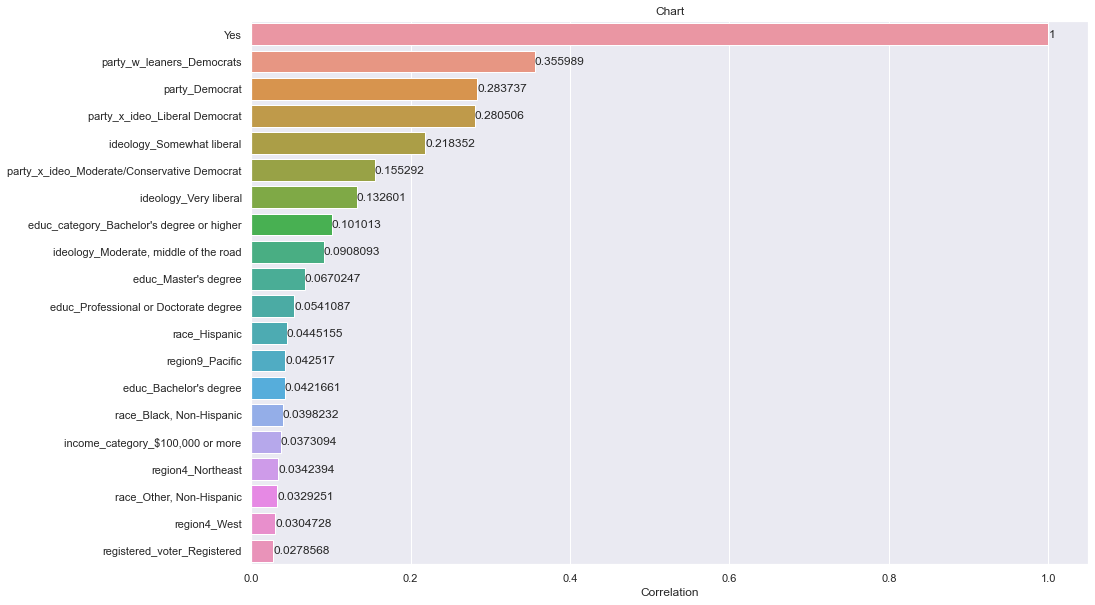

In [311]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Yes', y=top_corr1.index, data=top_corr1, orient='h')
ax.set_xlabel('Correlation')
ax.set_title('Chart')
for i in ax.containers:
    ax.bar_label(i)
;

''

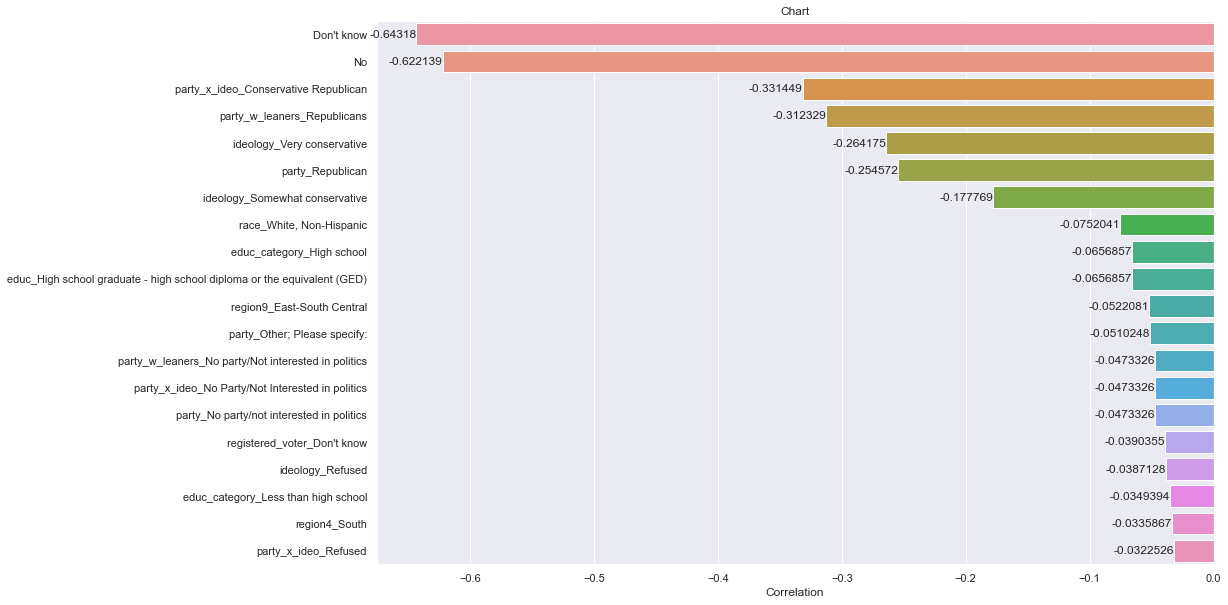

In [312]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Yes', y=top_corr_neg.index, data=top_corr_neg)
ax.set_xlabel('Correlation')
ax.set_title('Chart')
for i in ax.containers:
    ax.bar_label(i)
;

### A rough correlation heat map between features

<AxesSubplot:>

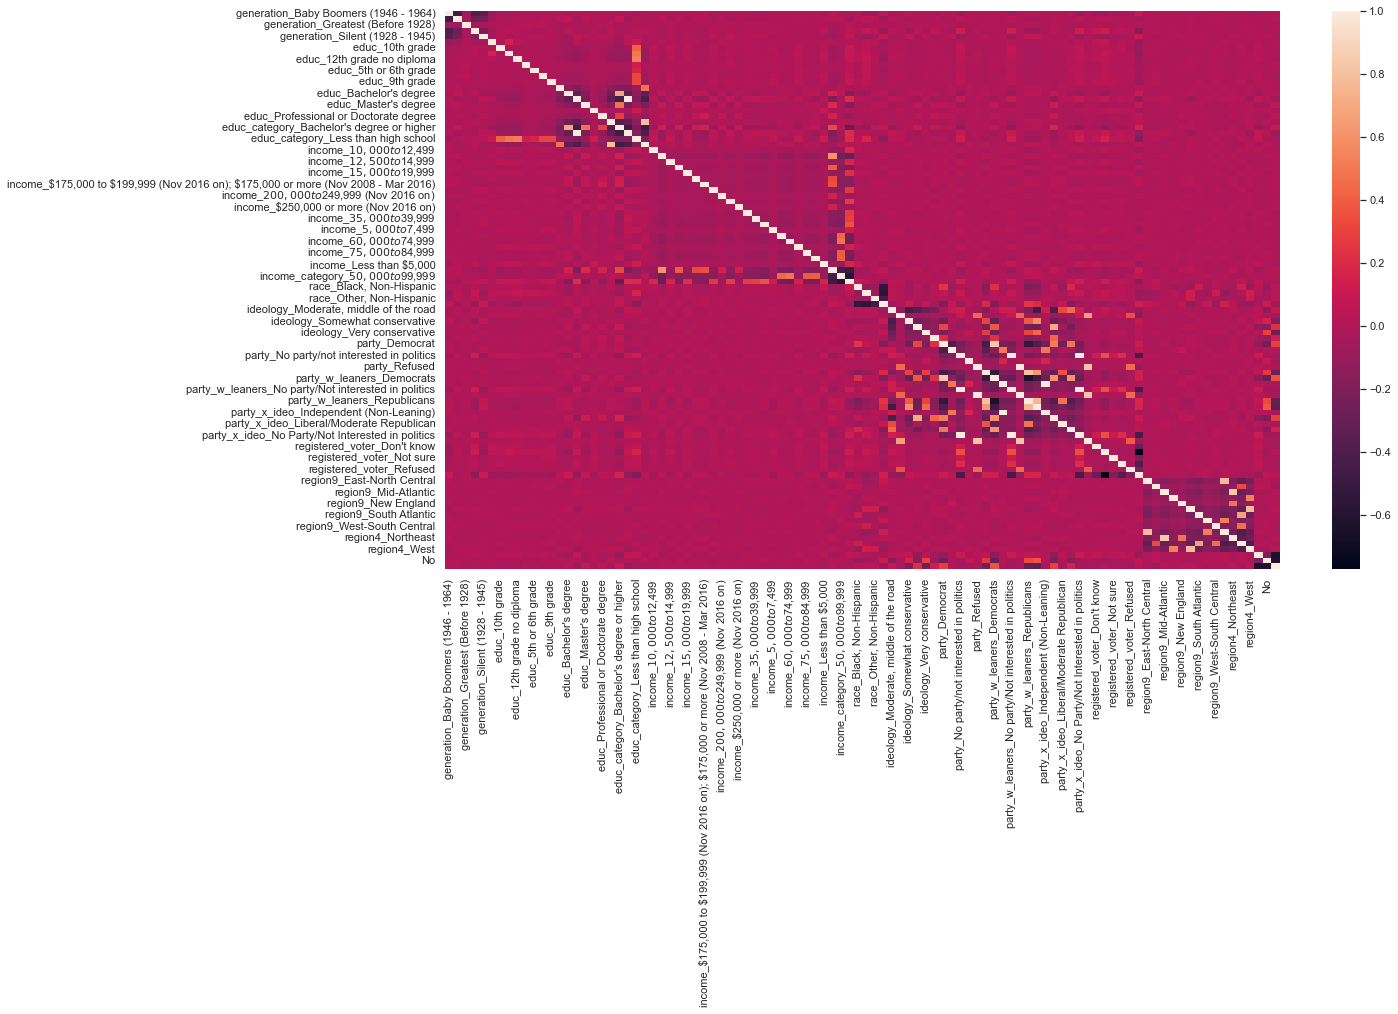

In [313]:
sns.set(rc={'figure.figsize':(18.7,10.27)})
sns.heatmap(dummies.corr())

### Checking distribution of all features

In [314]:
df2['generation'].value_counts(normalize=True)

Baby Boomers (1946 - 1964)    0.408682
Generation X (1965 - 1980)    0.240994
Millennials (1981 - 1996)     0.183620
Silent (1928 - 1945)          0.147237
iGen‎/Gen Z (1997 - )         0.012576
Greatest (Before 1928)        0.006892
Name: generation, dtype: float64

<AxesSubplot:xlabel='generation', ylabel='Count'>

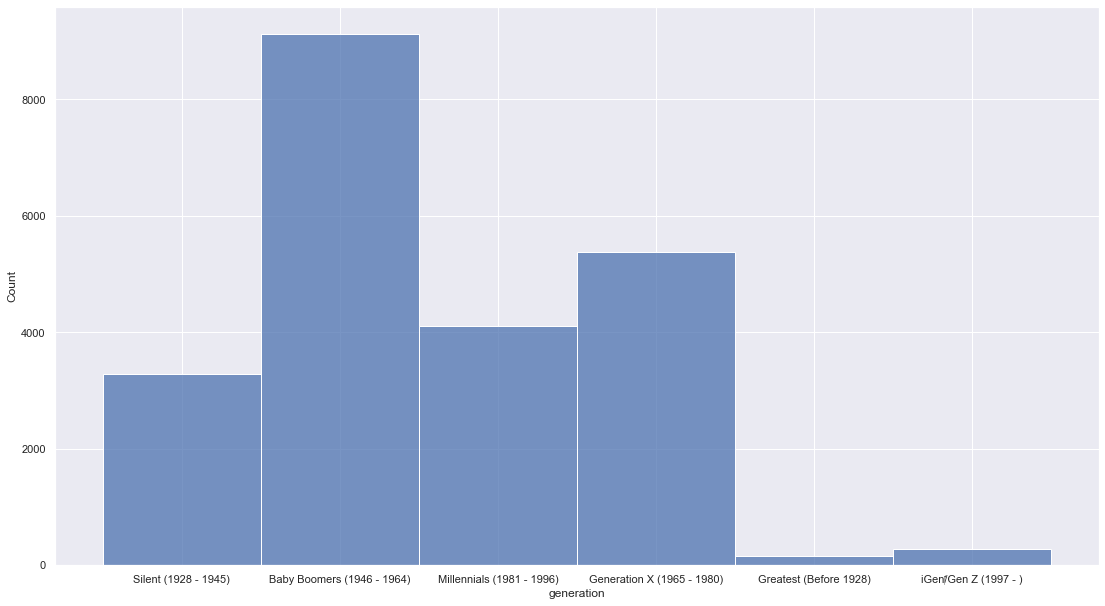

In [315]:
sns.histplot(data=df2, x = 'generation')

In [316]:
df2['educ'].value_counts(normalize=True)

High school graduate - high school diploma or the equivalent (GED)    0.282077
Some college, no degree                                               0.207697
Bachelor's degree                                                     0.199373
Master's degree                                                       0.105482
Associate's degree                                                    0.087402
Professional or Doctorate degree                                      0.039740
12th grade no diploma                                                 0.022108
11th grade                                                            0.020004
10th grade                                                            0.014231
9th grade                                                             0.008503
7th or 8th grade                                                      0.008235
5th or 6th grade                                                      0.002506
1st, 2nd, 3rd, or 4th grade                         

<AxesSubplot:xlabel='educ', ylabel='Count'>

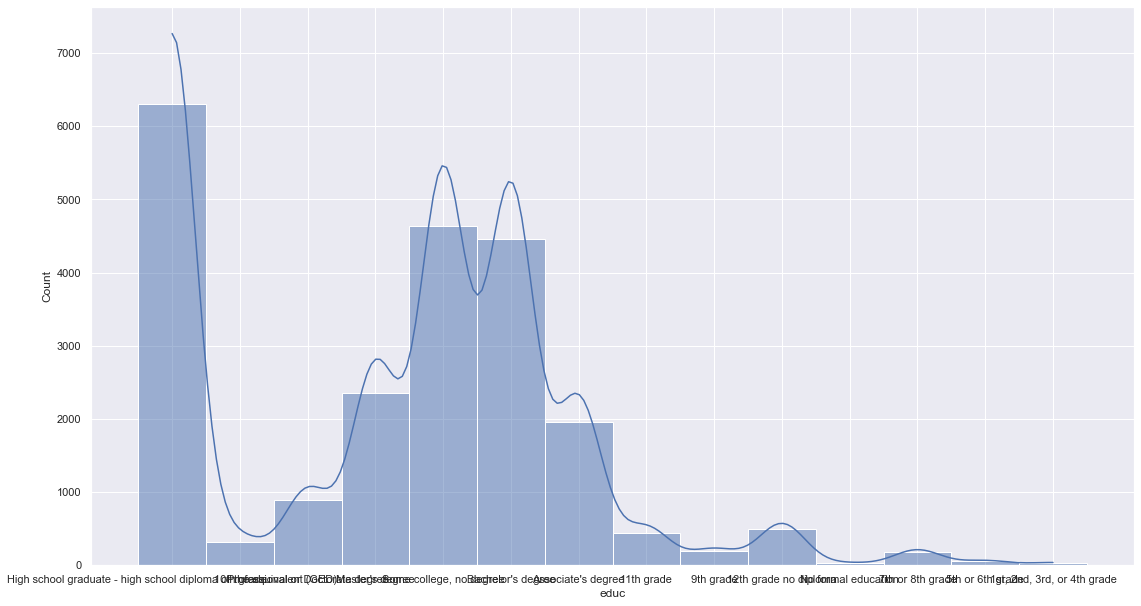

In [317]:
sns.histplot(data=df2, x = 'educ', kde=True)

In [318]:
df2['educ_category'].value_counts(normalize=True)

Bachelor's degree or higher    0.344596
Some college                   0.295100
High school                    0.282077
Less than high school          0.078228
Name: educ_category, dtype: float64

<AxesSubplot:xlabel='educ_category', ylabel='Count'>

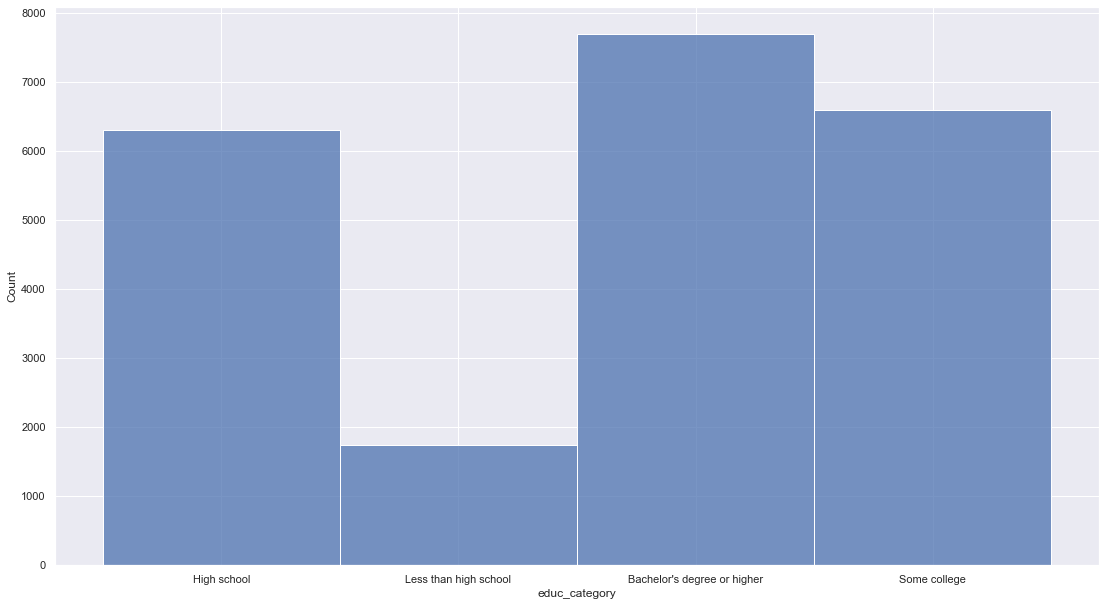

In [319]:
sns.histplot(data=df2, x = 'educ_category')

In [320]:
df2['income'].value_counts(normalize=True)

$100,000 to $124,999                                                          0.114880
$60,000 to $74,999                                                            0.106422
$50,000 to $59,999                                                            0.088029
$40,000 to $49,999                                                            0.078317
$85,000 to $99,999                                                            0.076393
$75,000 to $84,999                                                            0.071962
$125,000 to $149,999                                                          0.054017
$35,000 to $39,999                                                            0.053435
$30,000 to $34,999                                                            0.047930
$25,000 to $29,999                                                            0.046543
$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)    0.042247
$20,000 to $24,999                         

<AxesSubplot:xlabel='income', ylabel='Count'>

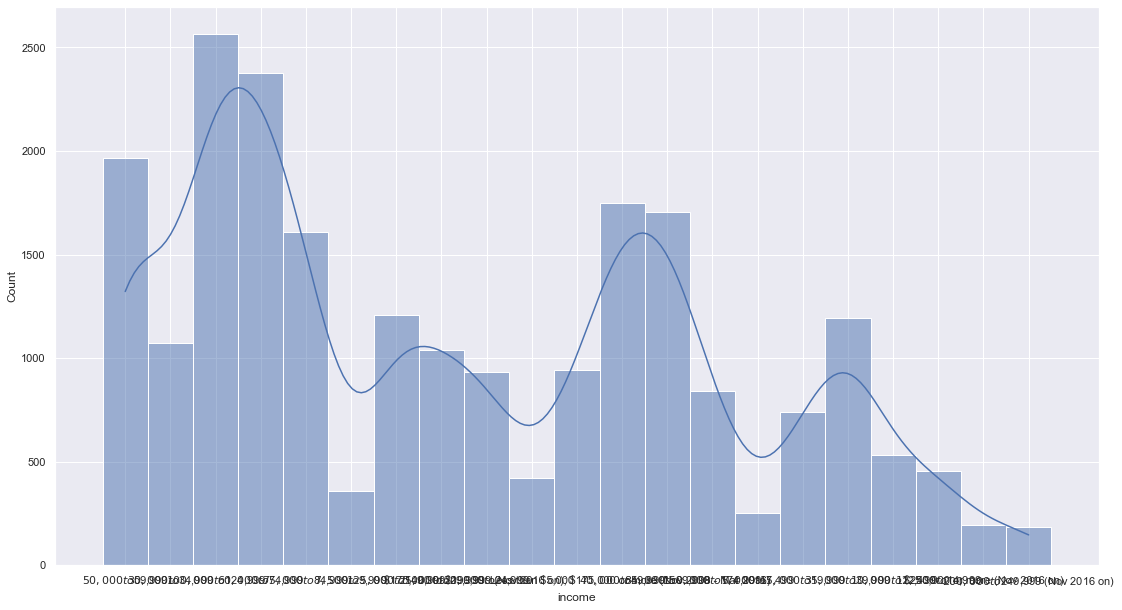

In [321]:
sns.histplot(data=df2, x = 'income', kde=True)

In [322]:
df2['income_category'].value_counts(normalize=True)

Less than $50,000     0.391586
$50,000 to $99,999    0.342806
$100,000 or more      0.265608
Name: income_category, dtype: float64

<AxesSubplot:xlabel='income_category', ylabel='Count'>

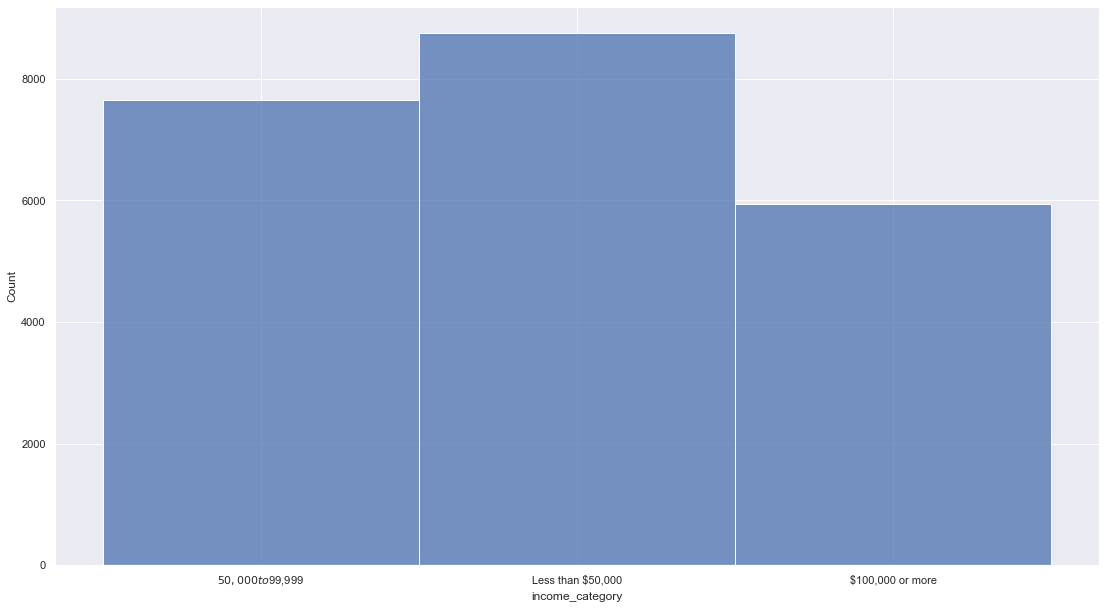

In [323]:
sns.histplot(data=df2, x = 'income_category')

In [324]:
df2['race'].value_counts(normalize=True)

White, Non-Hispanic    0.750817
Hispanic               0.099351
Black, Non-Hispanic    0.087402
Other, Non-Hispanic    0.062430
Name: race, dtype: float64

<AxesSubplot:xlabel='race', ylabel='Count'>

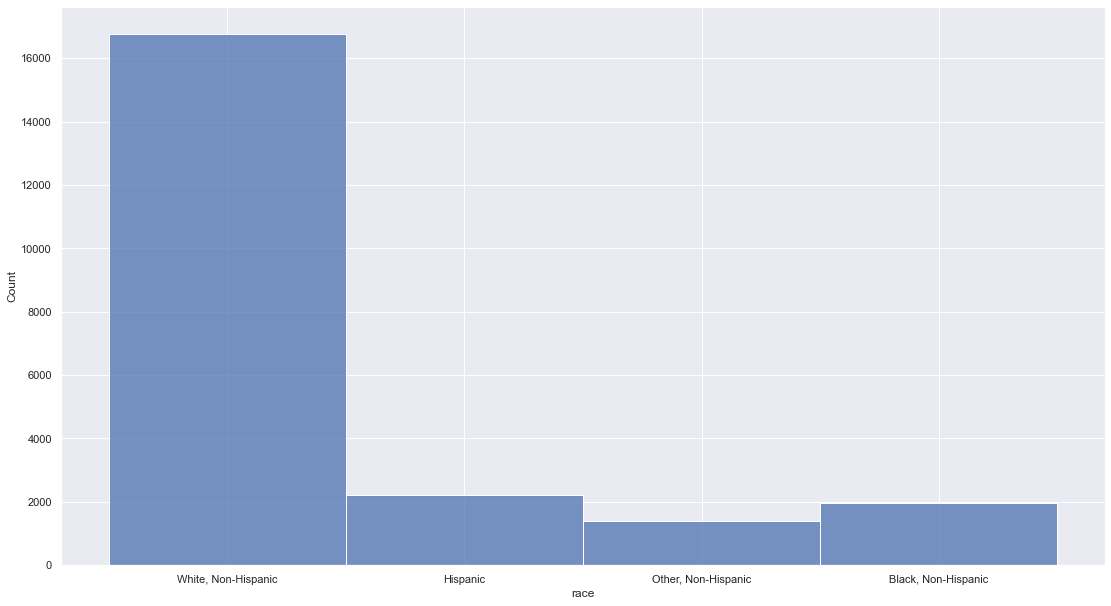

In [325]:
sns.histplot(data=df2, x = 'race')

In [326]:
df2['ideology'].value_counts(normalize=True)

Moderate, middle of the road    0.395480
Somewhat conservative           0.225554
Somewhat liberal                0.180488
Very conservative               0.109868
Very liberal                    0.069814
Refused                         0.018796
Name: ideology, dtype: float64

<AxesSubplot:xlabel='ideology', ylabel='Count'>

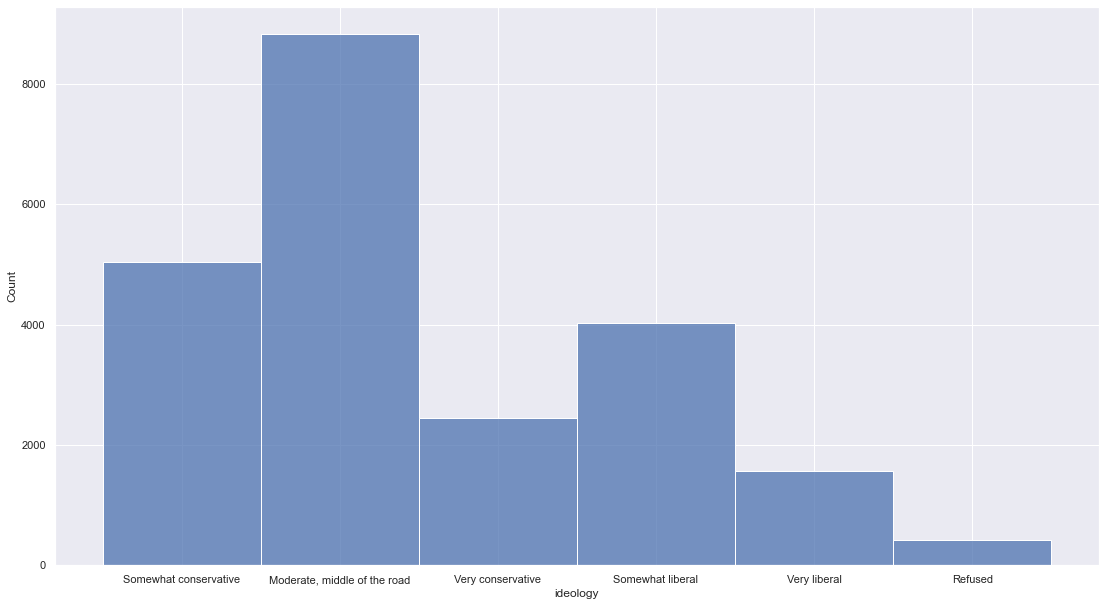

In [327]:
sns.histplot(data=df2, x = 'ideology')

In [328]:
df2['party'].value_counts(normalize=True)

Democrat                               0.331036
Republican                             0.271604
Independent                            0.250705
No party/not interested in politics    0.107988
Other; Please specify:                 0.029492
Refused                                0.009174
Name: party, dtype: float64

<AxesSubplot:xlabel='party', ylabel='Count'>

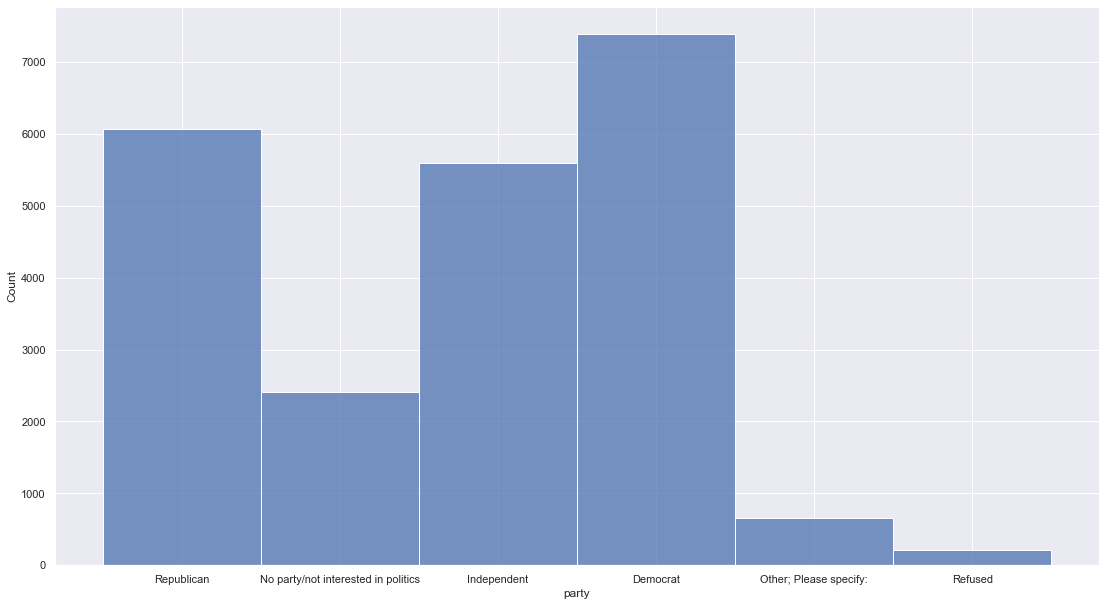

In [329]:
sns.histplot(data=df2, x = 'party')

In [330]:
df2['party_w_leaners'].value_counts(normalize=True)

Democrats                              0.413381
Republicans                            0.364780
No party/Not interested in politics    0.107988
Independent/Other                      0.104677
Refused                                0.009174
Name: party_w_leaners, dtype: float64

<AxesSubplot:xlabel='party_w_leaners', ylabel='Count'>

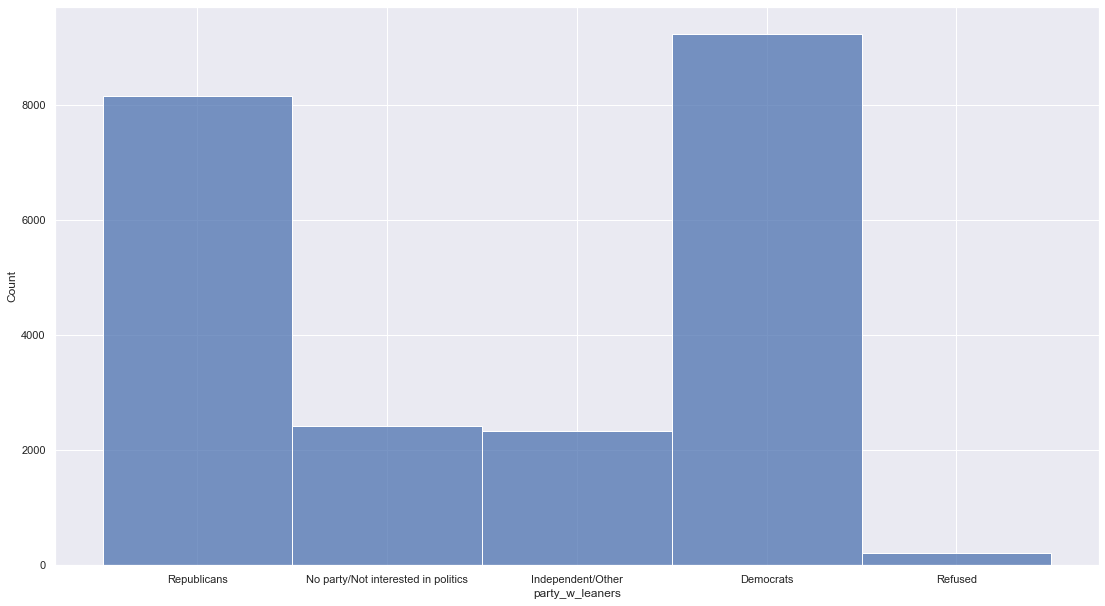

In [331]:
sns.histplot(data=df2, x = 'party_w_leaners')

In [332]:
df2['party_x_ideo'].value_counts(normalize=True)

Conservative Republican                0.245737
Moderate/Conservative Democrat         0.206892
Liberal Democrat                       0.203849
Liberal/Moderate Republican            0.117073
No Party/Not Interested in politics    0.107988
Independent (Non-Leaning)              0.104677
Refused                                0.013784
Name: party_x_ideo, dtype: float64

<AxesSubplot:xlabel='party_x_ideo', ylabel='Count'>

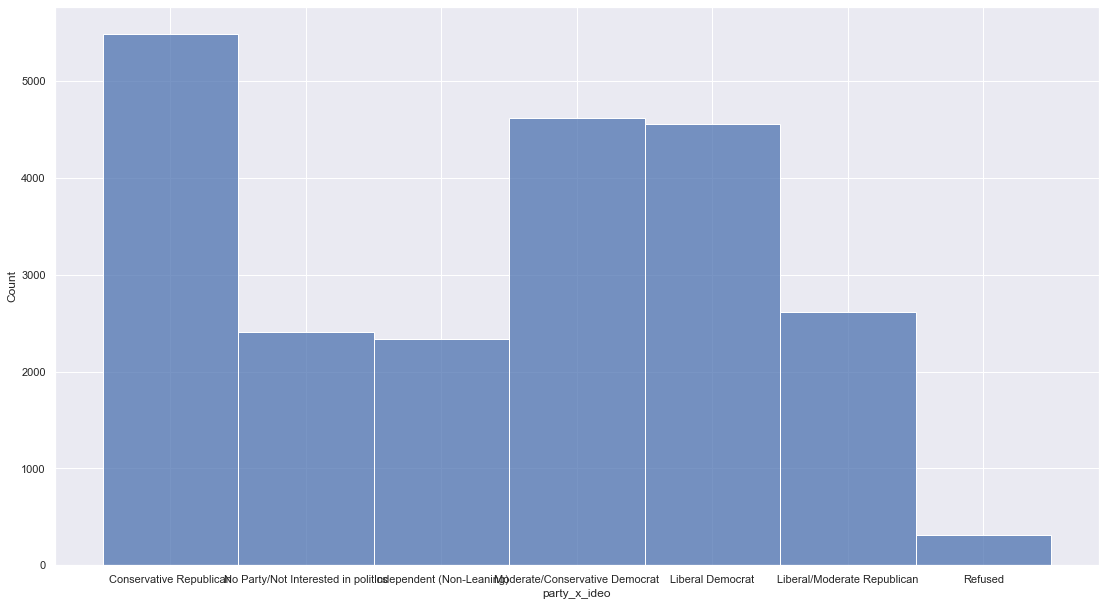

In [333]:
sns.histplot(data=df2, x = 'party_x_ideo')

In [334]:
df2['registered_voter'].value_counts(normalize=True)

Registered              0.842247
Not registered          0.100291
Prefer not to answer    0.026494
Don't know              0.015619
Refused                 0.008145
Not sure                0.007205
Name: registered_voter, dtype: float64

<AxesSubplot:xlabel='registered_voter', ylabel='Count'>

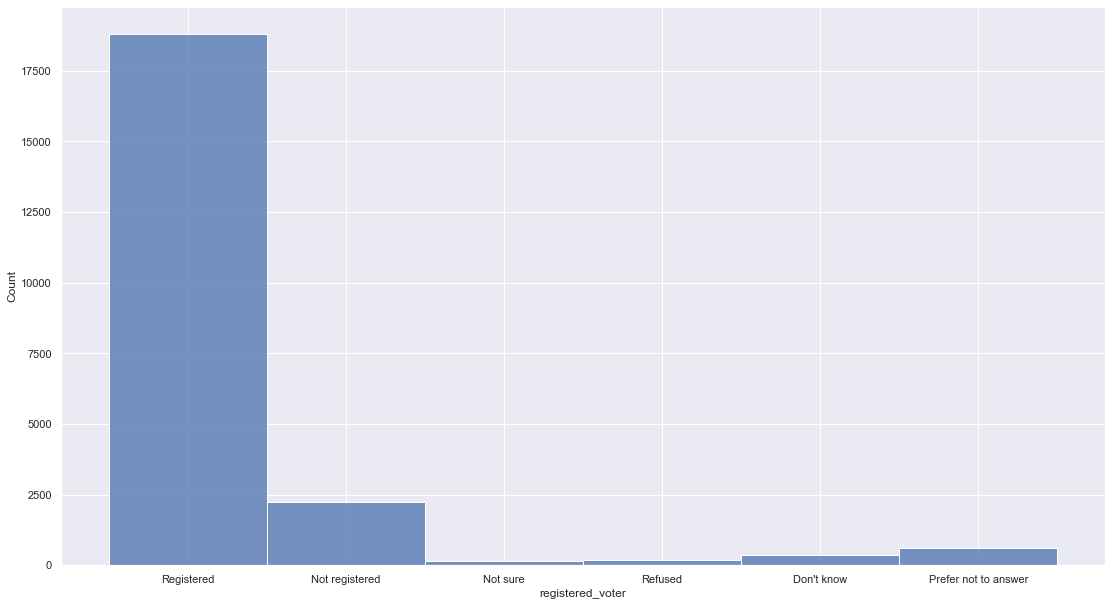

In [335]:
sns.histplot(data=df2, x = 'registered_voter')

In [336]:
df2['region9'].value_counts(normalize=True)

South Atlantic        0.193556
East-North Central    0.159723
Pacific               0.153905
Mid-Atlantic          0.134571
West-South Central    0.102260
West-North Central    0.077243
Mountain              0.075140
East-South Central    0.055359
New England           0.048243
Name: region9, dtype: float64

<AxesSubplot:xlabel='region9', ylabel='Count'>

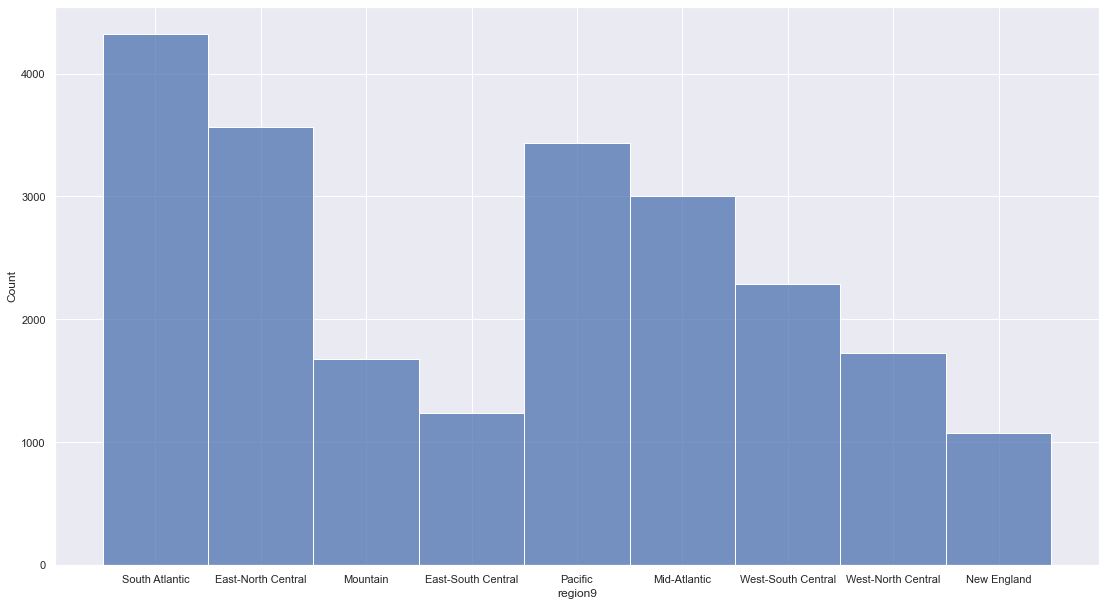

In [337]:
sns.histplot(data=df2, x = 'region9')

In [338]:
df2['region4'].value_counts(normalize=True)

South        0.351175
Midwest      0.236966
West         0.229045
Northeast    0.182815
Name: region4, dtype: float64

<AxesSubplot:xlabel='region4', ylabel='Count'>

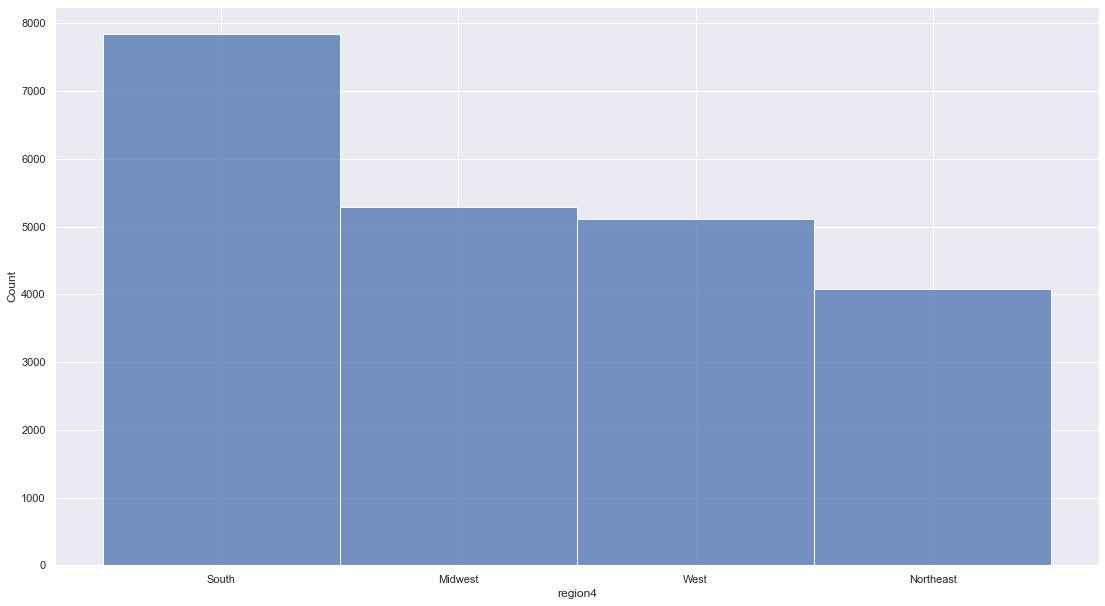

In [339]:
sns.histplot(data=df2, x = 'region4')

In [340]:
test_df = dummies.groupby('Yes').sum()

In [342]:
year_dum = pd.concat([df['year'], dummies], axis=1)

### Looking at responses for different categories for our features grouped by year to see changes over years

In [377]:
year_dum.groupby('year').sum()

,generation_Baby Boomers (1946 - 1964),generation_Generation X (1965 - 1980),generation_Greatest (Before 1928),generation_Millennials (1981 - 1996),generation_Silent (1928 - 1945),generation_iGen‎/Gen Z (1997 - ),educ_10th grade,educ_11th grade,educ_12th grade no diploma,"educ_1st, 2nd, 3rd, or 4th grade",educ_5th or 6th grade,educ_7th or 8th grade,educ_9th grade,educ_Associate's degree,educ_Bachelor's degree,educ_High school graduate - high school diploma or the equivalent (GED),educ_Master's degree,educ_No formal education,educ_Professional or Doctorate degree,"educ_Some college, no degree",educ_category_Bachelor's degree or higher,educ_category_High school,educ_category_Less than high school,educ_category_Some college,"income_$10,000 to $12,499","income_$100,000 to $124,999","income_$12,500 to $14,999","income_$125,000 to $149,999","income_$15,000 to $19,999","income_$150,000 to $174,999","income_$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)","income_$20,000 to $24,999","income_$200,000 to $249,999 (Nov 2016 on)","income_$25,000 to $29,999","income_$250,000 or more (Nov 2016 on)","income_$30,000 to $34,999","income_$35,000 to $39,999","income_$40,000 to $49,999","income_$5,000 to $7,499","income_$50,000 to $59,999","income_$60,000 to $74,999","income_$7,500 to $9,999","income_$75,000 to $84,999","income_$85,000 to $99,999","income_Less than $5,000","income_category_$100,000 or more","income_category_$50,000 to $99,999","income_category_Less than $50,000","race_Black, Non-Hispanic",race_Hispanic,"race_Other, Non-Hispanic","race_White, Non-Hispanic","ideology_Moderate, middle of the road",ideology_Refused,ideology_Somewhat conservative,ideology_Somewhat liberal,ideology_Very conservative,ideology_Very liberal,party_Democrat,party_Independent,party_No party/not interested in politics,party_Other; Please specify:,party_Refused,party_Republican,party_w_leaners_Democrats,party_w_leaners_Independent/Other,party_w_leaners_No party/Not interested in politics,party_w_leaners_Refused,party_w_leaners_Republicans,party_x_ideo_Conservative Republican,party_x_ideo_Independent (Non-Leaning),party_x_ideo_Liberal Democrat,party_x_ideo_Liberal/Moderate Republican,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,party_x_ideo_Refused,registered_voter_Don't know,registered_voter_Not registered,registered_voter_Not sure,registered_voter_Prefer not to answer,registered_voter_Refused,registered_voter_Registered,region9_East-North Central,region9_East-South Central,region9_Mid-Atlantic,region9_Mountain,region9_New England,region9_Pacific,region9_South Atlantic,region9_West-North Central,region9_West-South Central,region4_Midwest,region4_Northeast,region4_South,region4_West,Don't know,No,Yes
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,837.0,544.0,42.0,229.0,503.0,0.0,34.0,40.0,54.0,2.0,7.0,25.0,27.0,171.0,457.0,655.0,175.0,3.0,68.0,437.0,700.0,655.0,192.0,608.0,54.0,168.0,50.0,81.0,61.0,47.0,78.0,127.0,0.0,106.0,0.0,111.0,144.0,217.0,41.0,218.0,267.0,49.0,148.0,171.0,17.0,374.0,804.0,977.0,159.0,133.0,150.0,1713.0,859.0,29.0,520.0,423.0,218.0,106.0,752.0,513.0,173.0,58.0,9.0,650.0,924.0,217.0,173.0,9.0,832.0,547.0,217.0,435.0,281.0,480.0,173.0,22.0,0.0,194.0,37.0,0.0,9.0,1915.0,358.0,150.0,289.0,164.0,112.0,321.0,399.0,159.0,203.0,517.0,401.0,752.0,485.0,376.0,262.0,1517.0
2010,783.0,697.0,17.0,263.0,255.0,0.0,50.0,51.0,65.0,2.0,5.0,27.0,20.0,156.0,384.0,601.0,157.0,4.0,64.0,429.0,605.0,601.0,224.0,585.0,56.0,188.0,47.0,90.0,76.0,51.0,63.0,96.0,0.0,87.0,0.0,99.0,124.0,183.0,38.0,175.0,238.0,54.0,149.0,160.0,41.0,392.0,722.0,901.0,174.0,198.0,117.0,1526.0,807.0,50.0,471.0,328.0,262.0,97.0,651.0,491.0,247.0,66.0,34.0,526.0,794.0,212.0,247.0,34.0,728.0,517.0,212.0,329.0,205.0,459.0,247.0,46.0,0.0,243.0,52.0,0.0,15.0,1705.0,288.0,146.0,274.0,143.0,92.0,298.0,395.0,161.0,218.0,449.0,366.0,759.0,441.0,409.0,426.0,1180.0
2

### Creating a basic random forest model using only the features we have been working with

In [344]:
def score(model, name, X, y):
    cv = StratifiedKFold(n_splits=10,
                         random_state=620,
                         shuffle=True)
    s = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, s.mean(), 2 * s.std()))

In [345]:
rf = RandomForestClassifier(n_jobs=-1,
                            n_estimators = 150,
#                             criterion='entropy',
#                             max_features='sqrt',
#                             min_weight_fraction_leaf=.01,
#                             class_weight='balanced_subsample',
#                             min_impurity_decrease=.02,
#                             oob_score=True,
                            min_samples_split=.1,
                            max_depth = 100,
                            random_state=620)


In [348]:
X = dummies.drop(['Yes', 'No', "Don't know"], axis=1)
y = dummies['Yes']


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 620)

In [349]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_split=0.1, n_estimators=150,
                       n_jobs=-1, random_state=620)

In [350]:
score(rf, 'RF', X_train, y_train)

RF Score: 0.72 +- 0.017


In [351]:
score(rf, 'RF', X_test, y_test)

RF Score: 0.73 +- 0.033


In [352]:
score(rf, 'RF', X, y)

RF Score: 0.72 +- 0.021


In [353]:
feat_imp = pd.DataFrame({'Variable':X.columns,
                            'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)


### Getting the feature importances for basic random forest model

In [354]:
feat_imp

,Variable,Importance
64,party_w_leaners_Democrats,0.167744
69,party_x_ideo_Conservative Republican,0.162065
68,party_w_leaners_Republicans,0.104120
71,party_x_ideo_Liberal Democrat,0.090905
56,ideology_Very conservative,0.081921
58,party_Democrat,0.080229
63,party_Republican,0.065390
55,ideology_Somewhat liberal,0.047204
73,party_x_ideo_Moderate/Conservative Democrat,0.027638
54,ideology_Somewhat conservative,0.027431


In [368]:
def stackplot(group, title, Xaxis):
    fig, ax = plt.subplots(figsize=(10, 10))

    df.groupby(group)['happening'].value_counts(normalize=True).unstack().T.loc[['No', "Don't know", 'Yes']].T \
        .plot(kind='barh', 
              figsize=(10, 8), 
              stacked=True,
              color=['slategrey', 'deepskyblue', 'palegreen'], 
              ax=ax)

    ax.set_title(title, 
                 fontsize=15, 
                 fontweight='bold', 
                 color='firebrick', 
                 loc='left')
    ax.set_ylabel(Xaxis, weight='bold', labelpad=20)


    for rect in ax.patches:

        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        label_text = round(width, 2)

        label_x = x + width / 2
        label_y = y + height / 2
        ax.text(label_x, label_y, label_text, ha='center', va='center')
    ;


### Stacked bar plots normalized to see belief in climate change per feature

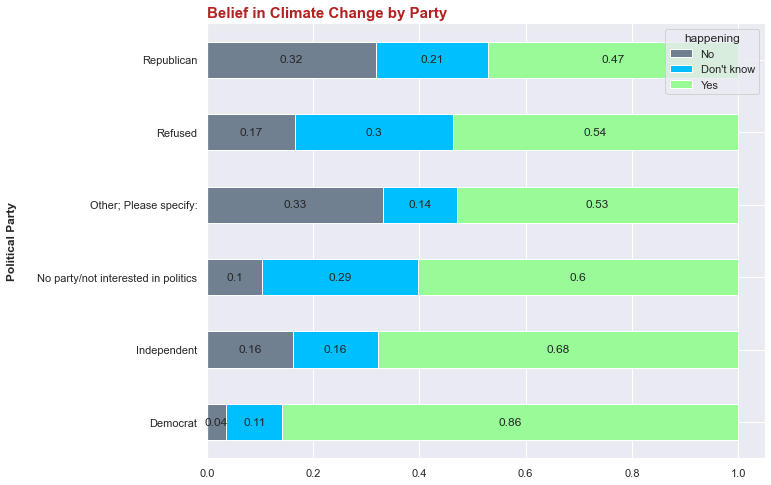

In [369]:
stackplot('party', 'Belief in Climate Change by Party', 'Political Party')

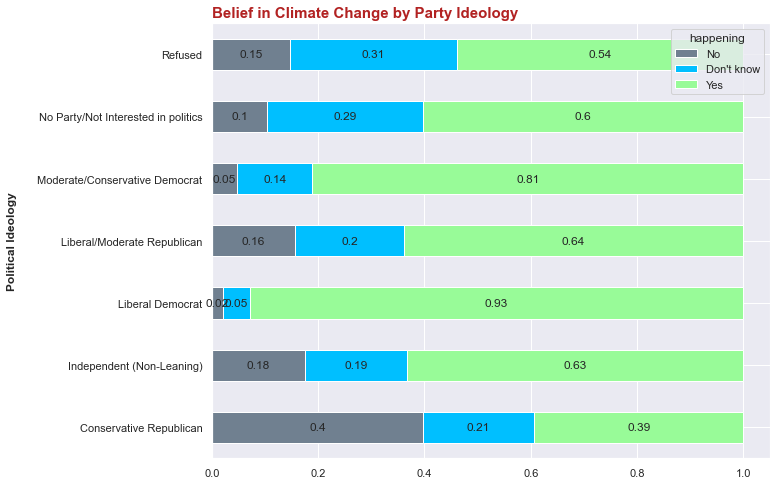

In [373]:
stackplot('party_x_ideo', 'Belief in Climate Change by Party Ideology', 'Political Ideology')

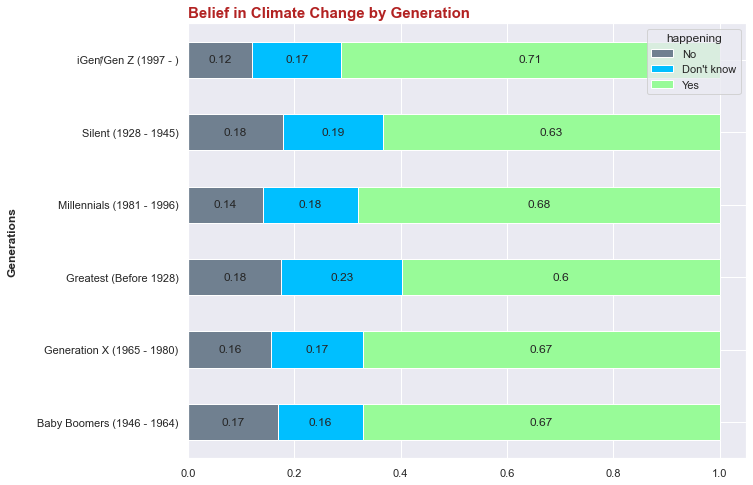

In [371]:
stackplot('generation', 'Belief in Climate Change by Generation', 'Generations')

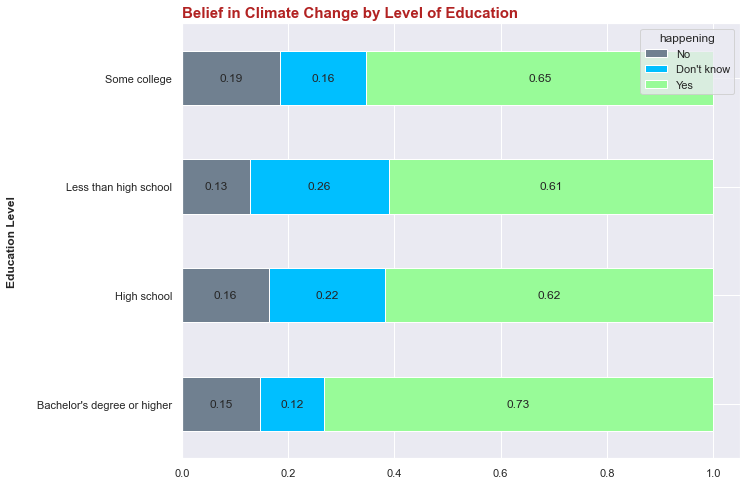

In [372]:
stackplot('educ_category', 'Belief in Climate Change by Level of Education', 'Education Level')

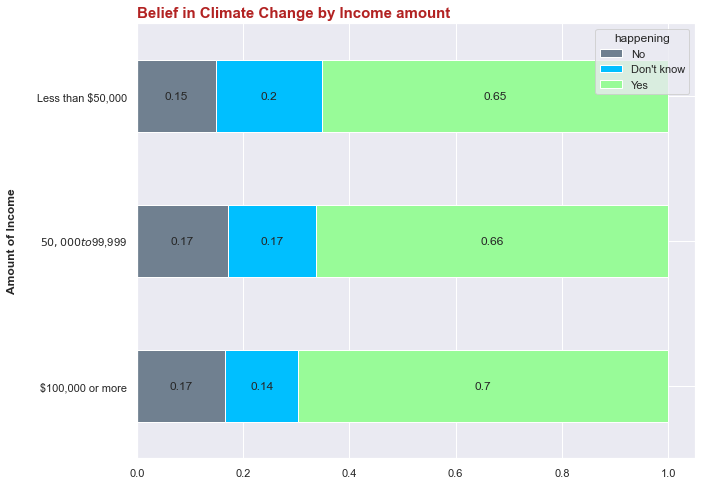

In [374]:
stackplot('income_category', 'Belief in Climate Change by Income amount', 'Amount of Income')

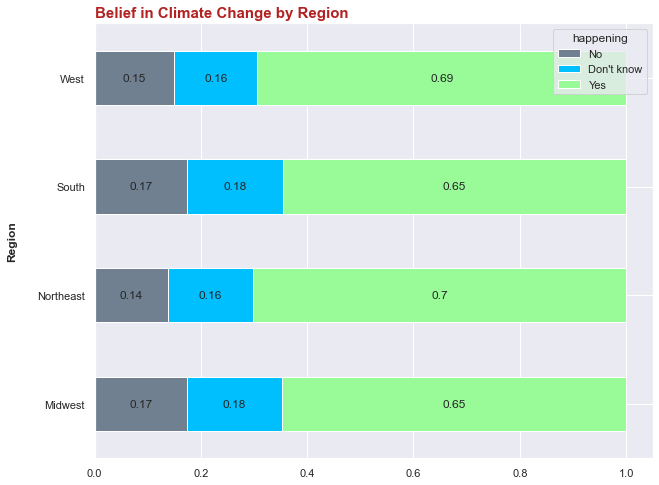

In [375]:
stackplot('region4', 'Belief in Climate Change by Region', 'Region')

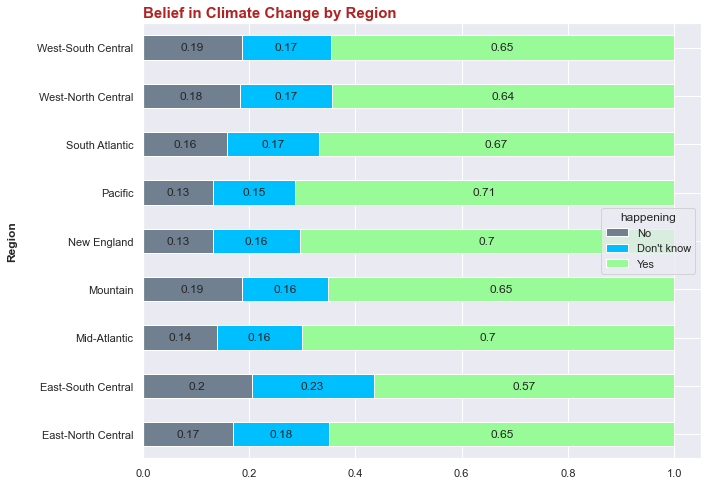

In [378]:
stackplot('region9', 'Belief in Climate Change by Region', 'Region')

### Recommendations for features to use in modeling

 * It appears that the group of people that feel most strongly about whether or not global warming is happening appears to be politically affiliated. We see the strongest change between majority 'yes' or majority 'no' to weather global warming is happening is seen with people affiliated with the Democratic and Republican party respectively as well as differing ideologies. 

* Education and income have been grouped in categories that are more normally distributed and will be useful for use in modeling.


* There is some variation in belief of global warming depending on the generation they were born in. It would be good to use this feature within our model.


* Region4 is an aggregated feature based on region9 locations. The more normalized region4 would be a good feature to use in the model as well

### Most interesting features:


- generation
- educ_category
- income_category
- party
- party_x_ideo
- region4

In [408]:
# ordinal_feat = df[['generation', 'educ_category', 'income_category']]
# nom_feat = df[['party', 'party_x_ideo', 'region4']]

In [409]:
# gen_lst = ['Greatest (Before 1928)','Silent (1928 - 1945)','Baby Boomers (1946 - 1964)',
#                                     'Generation X (1965 - 1980)','Millennials (1981 - 1996)',
#                                     'iGen\u200e/Gen Z (1997 - )']
# educ_lst = ['Less than high school','High school','Some college',
#                                      "Bachelor's degree or higher"]
# inc_lst = ['Less than $50,000', '$50,000 to $99,999', '$100,000 or more']


# ordinal = OrdinalEncoder(categories=[gen_lst, educ_lst, inc_lst],dtype=np.str_)



# ordinal_feat = ordinal.fit_transform(ordinal_feat)